In [23]:
import finance4py as fp

import matplotlib.pyplot as plt

from pandas_datareader.data import DataReader

%matplotlib inline

## finance4py plotting example
In this example I'm going to evaluate different indicator and plot them one using pyplot subplots.

In [11]:
# reading data from google finance
stock = DataReader('NFLX', 'google')

In [12]:
# extract bollinger bands
boll_bands = fp.bbands(stock.Close)

In [17]:
# extract average true range
atr = fp.average_true_range(stock)

In [18]:
rsi = fp.rsi(stock)

/home/neuro/PycharmProjects/finance4py/env/local/lib/python2.7/site-packages/finance4py-0.1.0-py2.7.egg/finance4py/finance4py.py:75: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=14).mean()
  roll_up = pd.stats.moments.ewma(up, window)
/home/neuro/PycharmProjects/finance4py/env/local/lib/python2.7/site-packages/finance4py-0.1.0-py2.7.egg/finance4py/finance4py.py:76: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=14).mean()
  roll_down = pd.stats.moments.ewma(down.abs(), window)


Date
2010-01-06    49.872123
2010-01-07    39.357024
2010-01-08    49.820639
2010-01-11    49.064759
2010-01-12    41.056008
Name: Close, dtype: float64

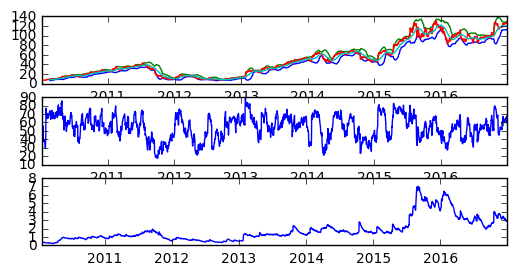

In [31]:
plt.figure(1)
plt.subplot(411)
plt.plot(boll_bands)

plt.subplot(412)
plt.plot(rsi)

plt.subplot(413)
plt.plot(atr['ATR'])

## Pyplot example of plotting multiple plots

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()